# Module 9

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import skimage as ski
import skimage.filters
import skimage.segmentation
import image_analysis as anl
import imageio as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')

In [2]:
figfile = 'Processed/'

# SVM Model Testing
An example of training dataset

In [3]:
image_file = 'Plates/plate_1.jpg'
pic = ski.color.rgb2gray(img.imread(image_file)).astype('double')
labelled = np.loadtxt('bacterial_colonies/labelled_colony_1.csv')
props = pd.read_csv('bacterial_colonies/bacterial_colony_1.csv',index_col=0)

In [4]:
#removes non-bacterial obects from labelled image
def remover(props, labelled):
    colonies = np.array(props['label'][props['bacteria']==1])
    col = np.zeros(np.shape(labelled))
    for i in colonies:
        col = np.where(labelled==i,1,col)
    return col

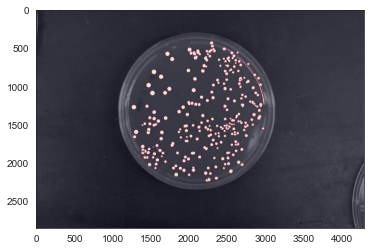

In [5]:
plt.imshow(pic,cmap='gray');
plt.imshow(remover(props,labelled),alpha=0.5);
plt.savefig(figfile+'SVM_training_image.png',dpi=300)

An example of tested dataset

In [6]:
image_file = 'Plates/plate_7.jpg'
pic = ski.color.rgb2gray(img.imread(image_file)).astype('double')
labelled = np.loadtxt('bacterial_colonies/labelled_colony_7.csv')
props = pd.read_csv('bacterial_colonies/tested_7.csv')
props = props.rename(columns={'yfit': 'bacteria'})

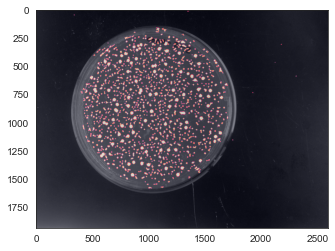

In [7]:
plt.imshow(pic,cmap='gray');
plt.imshow(remover(props,labelled),alpha=0.5);
plt.savefig(figfile+'SVM_test_image.png',dpi=300)

Comparing manual classification to SVM classifier on image with large number of connected objects.

In [8]:
image_file = 'Plates/plate_3.jpg'
pic = ski.color.rgb2gray(img.imread(image_file)).astype('double')
labelled = np.loadtxt('bacterial_colonies/labelled_colony_3.csv')
props = pd.read_csv('bacterial_colonies/tested_3.csv')
props_2 = props.copy(); props_2 = props_2.drop(['bacteria'],axis=1)
props_2 = props_2.rename(columns={'yfit': 'bacteria'})

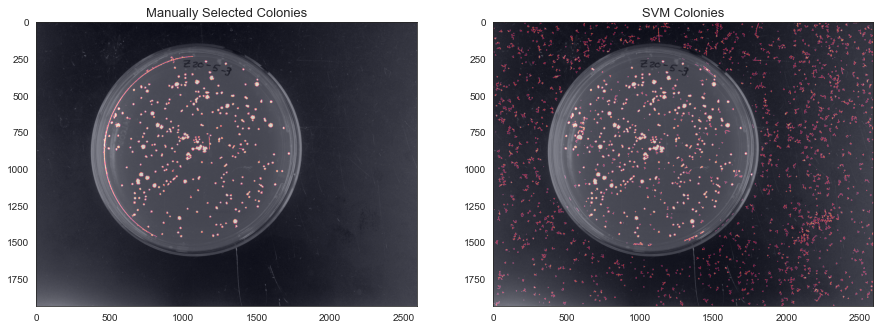

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(pic,cmap='gray')
ax[0].imshow(remover(props,labelled),alpha=0.5)
ax[0].set_title('Manually Selected Colonies',fontsize=13)
ax[1].imshow(pic,cmap='gray')
ax[1].imshow(remover(props_2,labelled),alpha=0.5)
ax[1].set_title('SVM Colonies',fontsize=13)
plt.savefig(figfile+'SVM_vs_manual.png',dpi=300)